# Data acquisition

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

def data_acquisition(dataset, split=False):
    df = pd.read_csv('../dataset/' + dataset + '.csv')
    x = df.iloc[:, 0:1].values
    y = df.iloc[:, 1:2].values
    return x, y

# Plot graph

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_graph_2D(model, x, y, title='Graph', _type=None, axis_x=None):
    plt.scatter(x, y)
    plt.title('Regressao linear simples')
    plt.xlabel('Idade')
    plt.ylabel('Custo')
    
    if _type == 'poly':
        plt.plot(x, model.predict(axis_x), color = 'red')
    elif _type == 'tree':
        plt.plot(axis_x, model.predict(axis_x), color = 'red')
    else:
        plt.plot(x, model.predict(x), color = 'red')

# Residue

In [12]:
from yellowbrick.regressor import ResidualsPlot

def visualize_residue(model, x, y):
    viewer = ResidualsPlot(model)
    viewer.fit(x,y)
    viewer.poof()

# Models

In [4]:
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler()
x, y = data_acquisition('plano_saude_2')

#### Linear regression

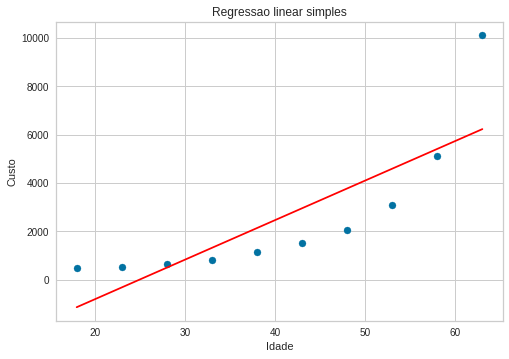

In [5]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x, y)
simple_linear_acc = model.score(x,y)
simple_linear_error = mean_absolute_error(y, model.predict(x))
plot_graph_2D(model, x, y, title='Simple Linear Regression')

#### Polynomial

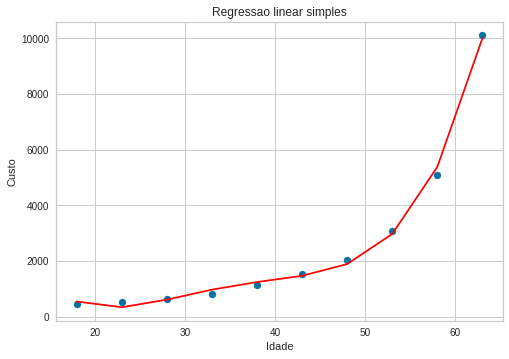

In [6]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 4)
x_poly = poly.fit_transform(x)
model = LinearRegression()
model.fit(x_poly, y)

poly_acc = model.score(x_poly, y)
poly_error = mean_absolute_error(y, model.predict(x_poly))

plot_graph_2D(model, x, y, title='Poly', _type='poly', axis_x=x_poly)

#### Decision tree

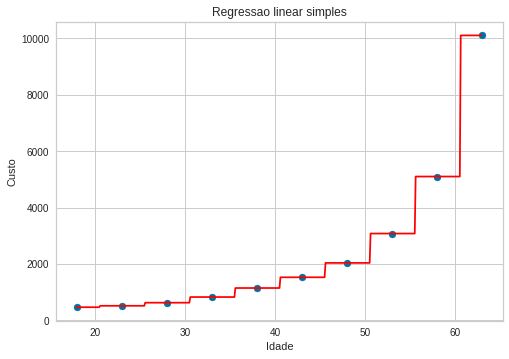

In [7]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(x, y)

decision_tree_acc = model.score(x, y)
decision_tree_error = mean_absolute_error(y, model.predict(x))

x_test = np.arange(min(x), max(x), 0.1).reshape(-1,1)
plot_graph_2D(model, x, y, title='Decision Tree', _type='tree', axis_x = x_test)

#### Random forest

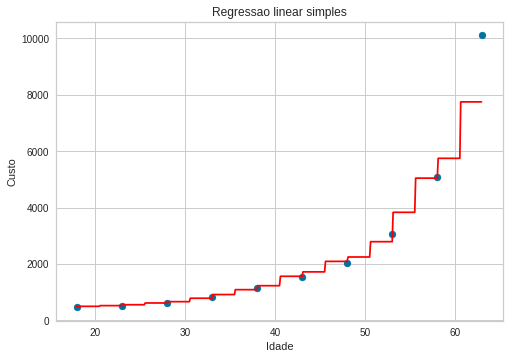

In [8]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators = 20)
model.fit(x, y.ravel())

random_forest_acc = model.score(x, y)
random_forest_error = mean_absolute_error(y, model.predict(x))

x_test = np.arange(min(x), max(x), 0.1).reshape(-1,1)
plot_graph_2D(model, x, y, title='Random Forest', _type='tree', axis_x = x_test)

#### SVR

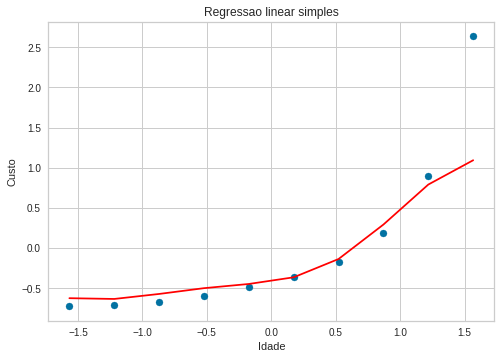

In [9]:
x = scaler.fit_transform(x)
y = scaler.fit_transform(y.reshape(-1,1))

from sklearn.svm import SVR
model = SVR(kernel = 'rbf')
model.fit(x,y.ravel())
svr_acc = model.score(x, y)
svr_error = mean_absolute_error(y, model.predict(x))

plot_graph_2D(model, x, y, title='SVR')

#### Neural network

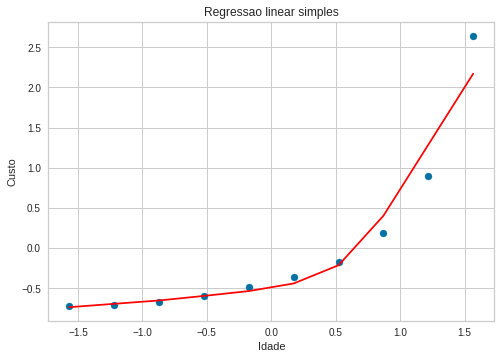

In [10]:
x = scaler.fit_transform(x)
y = scaler.fit_transform(y.reshape(-1,1))

from sklearn.neural_network import MLPRegressor
model = MLPRegressor(max_iter = 2000)
model.fit(x,y.ravel())

neural_network_acc = model.score(x, y)
neural_network_error = mean_absolute_error(y, model.predict(x))
plot_graph_2D(model, x, y, title='Neural Network')

# Results

In [11]:
RED = "\033[1;31m" 
RESET = '\033[0;0m'
NEGRITO = '\033[1m'
scores = {'Linear ': simple_linear_acc, 'Polynomial': poly_acc,
          'Decision Tree': decision_tree_acc, 'Random Forest': random_forest_acc, 'SVR     ': svr_acc, 
          'Neural Network': neural_network_acc}

errors = {'Linear ': simple_linear_error, 'Polynomial': poly_error,
          'Decision Tree': decision_tree_error, 'Random Forest': random_forest_error, 'SVR     ': svr_error, 
          'Neural Network': neural_network_error}

for model in scores:
        print('{}{}{} \t-> {}\tAcurácia:{} {:.1f}%{}{} \tErro:{} {:.2f}{}'.format(NEGRITO,model,RESET,NEGRITO,RED,(scores[model] * 100), RESET,NEGRITO,RED,errors[model],RESET))

Linear  	-> 	Acurácia: 67.2% 	Erro: 1289.75
Polynomial 	-> 	Acurácia: 99.8% 	Erro: 120.74
Decision Tree 	-> 	Acurácia: 100.0% 	Erro: 0.00
Random Forest 	-> 	Acurácia: 93.1% 	Erro: 293.75
SVR      	-> 	Acurácia: 75.6% 	Erro: 0.22
Neural Network 	-> 	Acurácia: 95.7% 	Erro: 0.13
